# Binary Classification

## Load Dataset from sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from IPython.display import Image


In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
df.describe()
#표를 보면 각 column들의 std랑 mean이 차이가 많이 난다. 
#하지만 먼저 랜덤하게 train, valid, test를 구성하고 나서 standarization 을 실행한다

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Convert to PyTorch Tensor

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([569, 31])

In [9]:
x = data[:, :-1] # data[행,렬]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [16]:
# Train / Valid / Test ratio
ratios = [.6, .2, .2] #6대,2대,2

In [17]:
print(data.size(0))
print(data.size(1))

569
31


In [18]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

Train 341 / Valid 113 / Test 115 samples.


In [19]:
#셔플링해서 인덱스섞은다음에 index_select해서 가져옴

indices = torch.randperm(data.size(0)) #568개를 셔플링하니깐 data.size(0) 쓰기

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x, y): #cnts = [], cnts가 배열이니깐 for문을 사용해서 반복 반환한다
    print(x_i.size(), y_i.size())

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


## Preprocessing - 전처리

In [20]:
print(x[0])
print(x[1])
print(x[2])

tensor([[1.2770e+01, 2.9430e+01, 8.1350e+01,  ..., 6.4980e-02, 2.4070e-01,
         6.4840e-02],
        [1.4600e+01, 2.3290e+01, 9.3970e+01,  ..., 1.3590e-01, 2.4770e-01,
         6.8360e-02],
        [1.7010e+01, 2.0260e+01, 1.0970e+02,  ..., 1.0960e-01, 3.2750e-01,
         6.4690e-02],
        ...,
        [7.7290e+00, 2.5490e+01, 4.7980e+01,  ..., 0.0000e+00, 3.0580e-01,
         9.9380e-02],
        [9.7770e+00, 1.6990e+01, 6.2500e+01,  ..., 5.3340e-02, 2.5330e-01,
         8.4680e-02],
        [1.1630e+01, 2.9290e+01, 7.4870e+01,  ..., 6.8350e-02, 2.8840e-01,
         7.2200e-02]])
tensor([[1.4190e+01, 2.3810e+01, 9.2870e+01,  ..., 1.7720e-01, 4.7240e-01,
         1.0260e-01],
        [1.3210e+01, 2.8060e+01, 8.4880e+01,  ..., 7.9580e-02, 2.4730e-01,
         6.4430e-02],
        [1.6780e+01, 1.8800e+01, 1.0930e+02,  ..., 1.4740e-01, 2.8100e-01,
         7.2280e-02],
        ...,
        [1.1330e+01, 1.4160e+01, 7.1790e+01,  ..., 1.1110e-02, 2.7580e-01,
         6.3860e-02],
   

In [21]:
#스케일링해서 정규화분포로 만들기
scaler = StandardScaler()
scaler.fit(x[0].numpy()) #x[0]은 train set의 입력. 그럼 scaler는 뮤와 시그마를 컬럼별로 가지고 있게됨.

#train set 인 x[0]만 scaler.fit 을 해준다. 정규분포로 만들어준다!!!! - 중요!!

#train,valid, test의 x값을 배열에 담기
x = [torch.from_numpy(scaler.transform(x[0].numpy())).float(), # 아까 구해놓은 평균과 표준편차를 적용해서 transform 함. x[0] - train
     torch.from_numpy(scaler.transform(x[1].numpy())).float(), #x[1] - valid
     torch.from_numpy(scaler.transform(x[2].numpy())).float()] #x[2] - test

#정규화시킨 변수들로 dataframe 만들기
df = pd.DataFrame(x[0].numpy(), columns=cancer.feature_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
336,-1.268486,-0.278333,-1.300007,-1.086157,-1.853533,-1.501916,-1.116926,-1.232452,-0.566383,0.232273,...,-1.323027,-0.827239,-1.358179,-1.060374,-2.643945,-1.495291,-1.351710,-1.753723,-1.663813,-1.105976
337,-0.613461,-0.877445,-0.627144,-0.626246,0.060872,-0.610896,-0.599217,-0.766279,0.968534,-0.461847,...,-0.551981,-0.151898,-0.595358,-0.579029,0.219007,-0.351898,-0.232657,-0.592184,0.785303,-0.277746
338,-1.840484,1.416431,-1.828922,-1.410050,-1.060984,-1.033581,-1.116926,-1.232452,0.215488,1.446620,...,-1.508603,0.847010,-1.509967,-1.162074,-0.301687,-1.124470,-1.351710,-1.753723,0.250496,0.944273
339,-1.252110,-0.565067,-1.226581,-1.079934,0.507544,-0.381903,-0.576394,-0.787549,-0.814996,1.127817,...,-1.097670,-0.721043,-1.076416,-0.945186,0.606299,-0.509188,-0.709994,-0.941925,-0.624188,0.052333
340,-0.719759,2.302278,-0.713429,-0.709812,-0.191804,-0.350484,-0.223938,-0.727744,-0.040331,-0.174925,...,-0.666534,2.156209,-0.647348,-0.652115,0.343800,-0.333393,0.091163,-0.713482,-0.039399,-0.704906


* Scaling 스케일링을 하는 이유
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 target에 미치는 영향력이 제대로 표현되지 않을 수 있습니다. skelarn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 min-max 스케일링과 z- 정규화를 이용한  standard 스케일링이 있슴


* torch.from_numpy()
tensor로 변환할 때, 원래 메모리를 상속받는다. (=as_tensor())


* Tensor에서 Numpy로: numpy()
반대로 Tensor를 Numpy array로 바꾸고 싶다면 numpy함수를 사용하면 된다. a = torch.rand(3.3).numpy()


## Build Model & Optimizer

In [23]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25), #train set이 들어가야하니깐 train set인 x[0]의 차원(-1) 넣어주기
    nn.LeakyReLU(), #LeakyReLu = 비선형 활성화 함수
    nn.Linear(25, 20),
    nn.LeakyReLU(),
    nn.Linear(20, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 5),
    nn.LeakyReLU(),
    nn.Linear(5, y[0].size(-1)), #출력값은 train set의 차원(= y[0].size(-1)) 써준다
    nn.Sigmoid(), #binary classification할때는 sigmoid를 써줘야한다
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
  (11): Sigmoid()
)

In [24]:
optimizer = optim.Adam(model.parameters())

## Train

In [25]:
n_epochs = 10000
batch_size = 32
print_interval = 100
early_stop = 1000

In [26]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [27]:
train_history, valid_history = [], []

for i in range(n_epochs): #epoch에 대한 for문. 셔플링해준다
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0) #batch사이즈로 균등하게 split
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_): #mini-batch에 대한 for문. 위에서 만든 mini-batch로 손실값구한다. 
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i) #분류니깐 mse 안쓰고 binary cross entropy(BCE) 쓴다.

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()        
        train_loss += float(loss) # This is very important to prevent memory leak.

    train_loss = train_loss / len(x_) #평균 train_loss 구하기
        
    with torch.no_grad(): # valid set은 셔플링 할필요없고 배치사이즈로 나눠주고 loss 만 구하면됨 
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i) #BCELoss
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i] #값을 배열로 저장
            
    valid_loss = valid_loss / len(x_)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
        
    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

Epoch 100: train loss=2.0363e-04  valid_loss=1.7477e+00  lowest_loss=1.6271e-01
Epoch 200: train loss=2.6560e-05  valid_loss=2.4459e+00  lowest_loss=1.6271e-01
Epoch 300: train loss=8.0797e-06  valid_loss=3.1100e+00  lowest_loss=1.6271e-01
Epoch 400: train loss=3.1353e-06  valid_loss=3.1153e+00  lowest_loss=1.6271e-01
Epoch 500: train loss=1.4115e-06  valid_loss=3.1203e+00  lowest_loss=1.6271e-01
Epoch 600: train loss=6.6693e-07  valid_loss=3.1249e+00  lowest_loss=1.6271e-01
Epoch 700: train loss=3.3376e-07  valid_loss=3.1292e+00  lowest_loss=1.6271e-01
Epoch 800: train loss=2.1021e-07  valid_loss=3.1335e+00  lowest_loss=1.6271e-01
Epoch 900: train loss=8.4174e-08  valid_loss=3.1379e+00  lowest_loss=1.6271e-01
Epoch 1000: train loss=4.3349e-08  valid_loss=3.1423e+00  lowest_loss=1.6271e-01
There is no improvement during last 1000 epochs.
The best validation loss from epoch 14: 1.6271e-01


<All keys matched successfully>

## Loss History

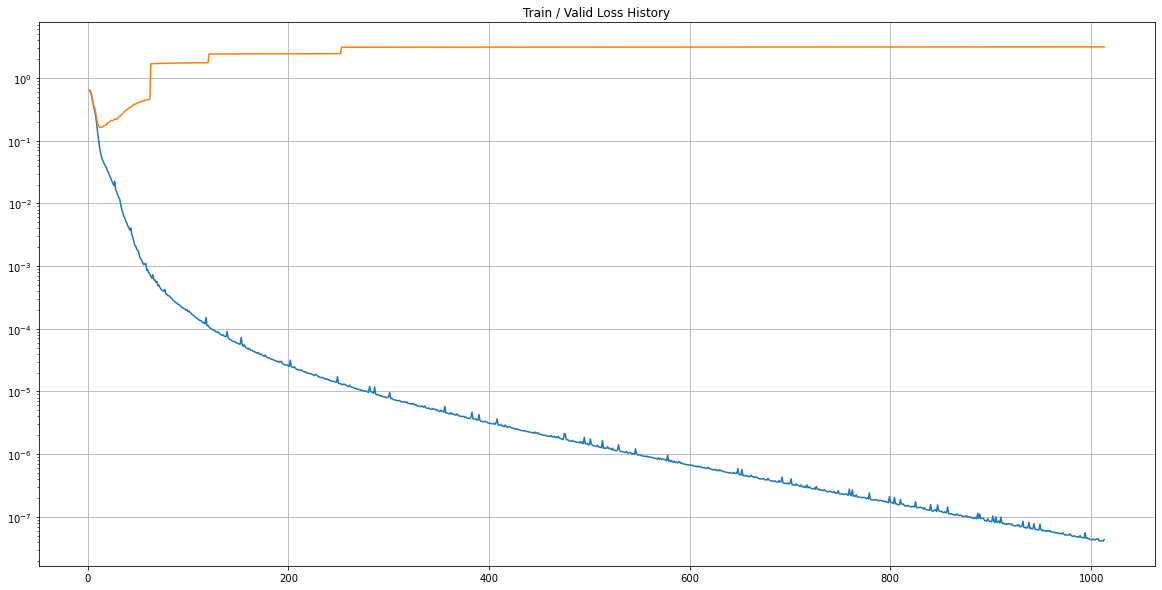

In [28]:
plot_from = 2

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

## Let's see the result!

In [29]:
test_loss = 0
y_hat = []

with torch.no_grad(): #test set을 미니배치
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss #loss.backward 할 필요없음. 그냥 더해주기만 하면됨

        y_hat += [y_hat_i] #y_hat의 값을 배열로 저장

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0) #accuracy 구하기 위해 y_hat값 붙여준다

print("Test loss: %.4e" % test_loss)

Test loss: 4.7561e-02


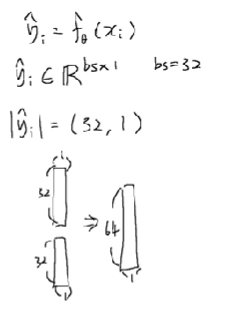

In [4]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\100.png")

이번 실습은 일반적인 회귀regression가 아닌 분류 실습이기 때문에, 정확도accruracy도 계산할 수 있습니다. 모델의 예측 값이 0.5보다 클 경우에는 1로 예측한 것으로 가정하고, 작거나 같은 경우에는 0으로 예측한 것이라고 가정합니다. 그렇게 가정했을 때, 실제 정답과 똑같은 갯수를 구하고 전체 갯수로 나누면 정확도를 구할 수 있습니다.

In [30]:
#Test Accuaracy 구하기
correct_cnt = (y[2] == (y_hat > .5)).sum() #y[2]는 갯수로 나옴. 그래서 sum하면 True 인 갯수들이 나옴
total_cnt = float(y[2].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

Test Accuracy: 0.9739


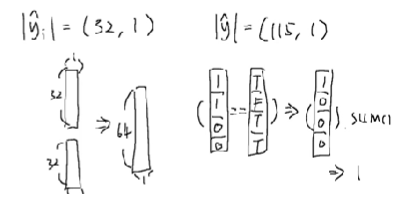

In [2]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\2.png")

계산 결과 테스트 데이터셋에 대해서 무려 98%의 높은 정확도를 보이는 것으로 나타났습니다.

그럼 예측 값의 분포도 확인해보도록 하겠습니다. 각 클래스별로 다른 색깔로 칠해 히스토그램histogram으로 나타냈을 떄, 각 클래스의 분포가 서로 겹치지 않을수록 좋은 예측이라고 볼 수 있습니다.

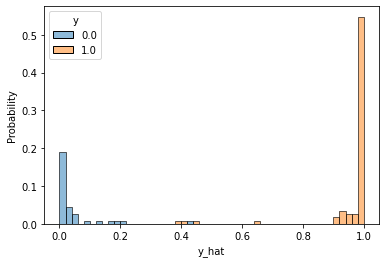

In [31]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(), #y[2]는 test set의 y값. y_hat은 결과값
                  columns=["y", "y_hat"]) # y값과 y_hat로만 이루어진 dataframe 만들기

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()

In [32]:
df

,y,y_hat
0,0.0,0.000029
1,0.0,0.053200
2,1.0,0.999953
3,0.0,0.033534
4,0.0,0.034518
...,...,...
110,1.0,0.999976
111,1.0,0.997793
112,1.0,0.993751
113,1.0,0.998241


그림을 확인해보면 극히 일부를 제외하고 대부분 왼쪽과 오른쪽에 잘 나뉘어져 있는 것을 확인할 수 있습니다.

이번에는 AUROC를 구해보도록 하겠습니다. AUROC는 sklearn을 활용해서 쉽게 계산할 수 있습니다.

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df.values[:, 0], df.values[:, 1])

0.9951550387596899

정답 값과 예측 실수 값을 함께 넣어주면 자동으로 계산해주는데요, 앞서 그림에서 보았듯이 두 클래스의 분포가 확연하게 나뉠 수 있는 상황이기 때문에 매우 높은 값을 보여줍니다.